In [1]:
import pandas as pd
import itertools
import string
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
import random
import joblib

In [2]:
df=pd.read_csv('C:/Users/tom98/Desktop/MINI PROJECT/APP/app_review.csv', encoding='latin-1')

In [3]:
df.head()

,ID,AppName,Description,Usedfor,Rating,Review,Date,UsefulCount
0,1.0,Airbnb,A booking service for unique lodging and imme...,Travel & Hospitality,2.8,I had an amazing experience staying in local h...,24-Jan-03,113
1,2.0,Wish,A global ecommerce platform known for discoun...,Shopping & Finance,3.6,"The deals are incredible, though sometimes you...",8-Apr-23,98
2,3.0,Flipboard,A news app that curates trending stories and ...,News & Media,3.5,This app keeps me informed and organized. I lo...,27-Jan-08,291
3,4.0,Udemy,"A platform for learning, with courses across ...",Productivity & Learning,2.5,I?ve learned so many new skills with Udemy! Th...,1-Jan-00,96
4,5.0,Stumble Guys,A popular multiplayer arcade game with over t...,Productivity & Learning,3.4,Such a fun and chaotic game to play with frien...,28-May-09,192


In [4]:
df.Usedfor.value_counts()

Usedfor
Productivity & Learning              397
Shopping & Finance                   304
Social Media & Communication Apps    254
Video and Entertainment              222
Health & Fitness                     201
Gaming                               157
AI & Photography                     148
Food & Drink                          25
Education & Learning                  22
Education & Creativity                18
Utilities & Navigation                17
Audio & Media                         17
Education & Nature                    16
Social Media & Communication          14
News & Media                          14
Travel & Adventure                    13
Health & Wellness                     13
Outdoors & Sports                     13
Shopping & Utilities                  12
Weather & Environment                 11
Shopping & Beauty                     11
Education & Music                     10
Security & Privacy                    10
Travel & Hospitality                  10
Educatio

In [5]:
df['Usedfor'] = df['Usedfor'].str.strip()

In [6]:
df['Usedfor'].unique()

array(['Travel & Hospitality', 'Shopping & Finance', 'News & Media',
       'Productivity & Learning', 'Social Media & Communication Apps',
       'AI & Photography', 'Security & Privacy', 'Audio & Literature',
       'Travel & Adventure', 'Audio & Media', 'Education & Nature',
       'Travel & Experiences', 'Outdoors & Sports', 'Accessibility',
       'Social Media & Communication', 'Education & Exploration',
       'Gaming', 'Shopping & Beauty', 'Health & Fitness',
       'Health & Wellness', 'Video and Entertainment',
       'Education & Creativity', 'Food & Drink', 'Social & Events',
       'Utilities & Navigation', 'Education & Music', 'Education & Tech',
       'Social Media & Learning', 'Entertainment', 'Education & Learning',
       'Shopping & Utilities', 'Travel & Communication',
       'Weather & Environment'], dtype=object)

In [7]:
df_train = df[(df['Usedfor'] == 'Productivity & Learning') |
              (df['Usedfor'] == 'Shopping & Finance') |
              (df['Usedfor'] == 'Social Media & Communication Apps') |
              (df['Usedfor'] == 'Video and Entertainment')]

In [8]:
df.shape

(2000, 8)

In [9]:
df_train.shape

(1177, 8)

In [10]:
X = df_train.drop(['ID','Rating','Date','UsefulCount'], axis=1)

In [11]:
X.head()

,AppName,Description,Usedfor,Review
1,Wish,A global ecommerce platform known for discoun...,Shopping & Finance,"The deals are incredible, though sometimes you..."
3,Udemy,"A platform for learning, with courses across ...",Productivity & Learning,I?ve learned so many new skills with Udemy! Th...
4,Stumble Guys,A popular multiplayer arcade game with over t...,Productivity & Learning,Such a fun and chaotic game to play with frien...
5,BeReal,"A realtime, candid photo sharing app that sur...",Social Media & Communication Apps,"It?s refreshing to see real, unfiltered photos..."
8,Bumble BFF,"A spin off of the dating app Bumble, focused ...",Social Media & Communication Apps,Bumble BFF made meeting new friends feel easy ...


In [12]:
X.Usedfor.value_counts()

Usedfor
Productivity & Learning              397
Shopping & Finance                   304
Social Media & Communication Apps    254
Video and Entertainment              222
Name: count, dtype: int64

In [13]:
X.head()

,AppName,Description,Usedfor,Review
1,Wish,A global ecommerce platform known for discoun...,Shopping & Finance,"The deals are incredible, though sometimes you..."
3,Udemy,"A platform for learning, with courses across ...",Productivity & Learning,I?ve learned so many new skills with Udemy! Th...
4,Stumble Guys,A popular multiplayer arcade game with over t...,Productivity & Learning,Such a fun and chaotic game to play with frien...
5,BeReal,"A realtime, candid photo sharing app that sur...",Social Media & Communication Apps,"It?s refreshing to see real, unfiltered photos..."
8,Bumble BFF,"A spin off of the dating app Bumble, focused ...",Social Media & Communication Apps,Bumble BFF made meeting new friends feel easy ...


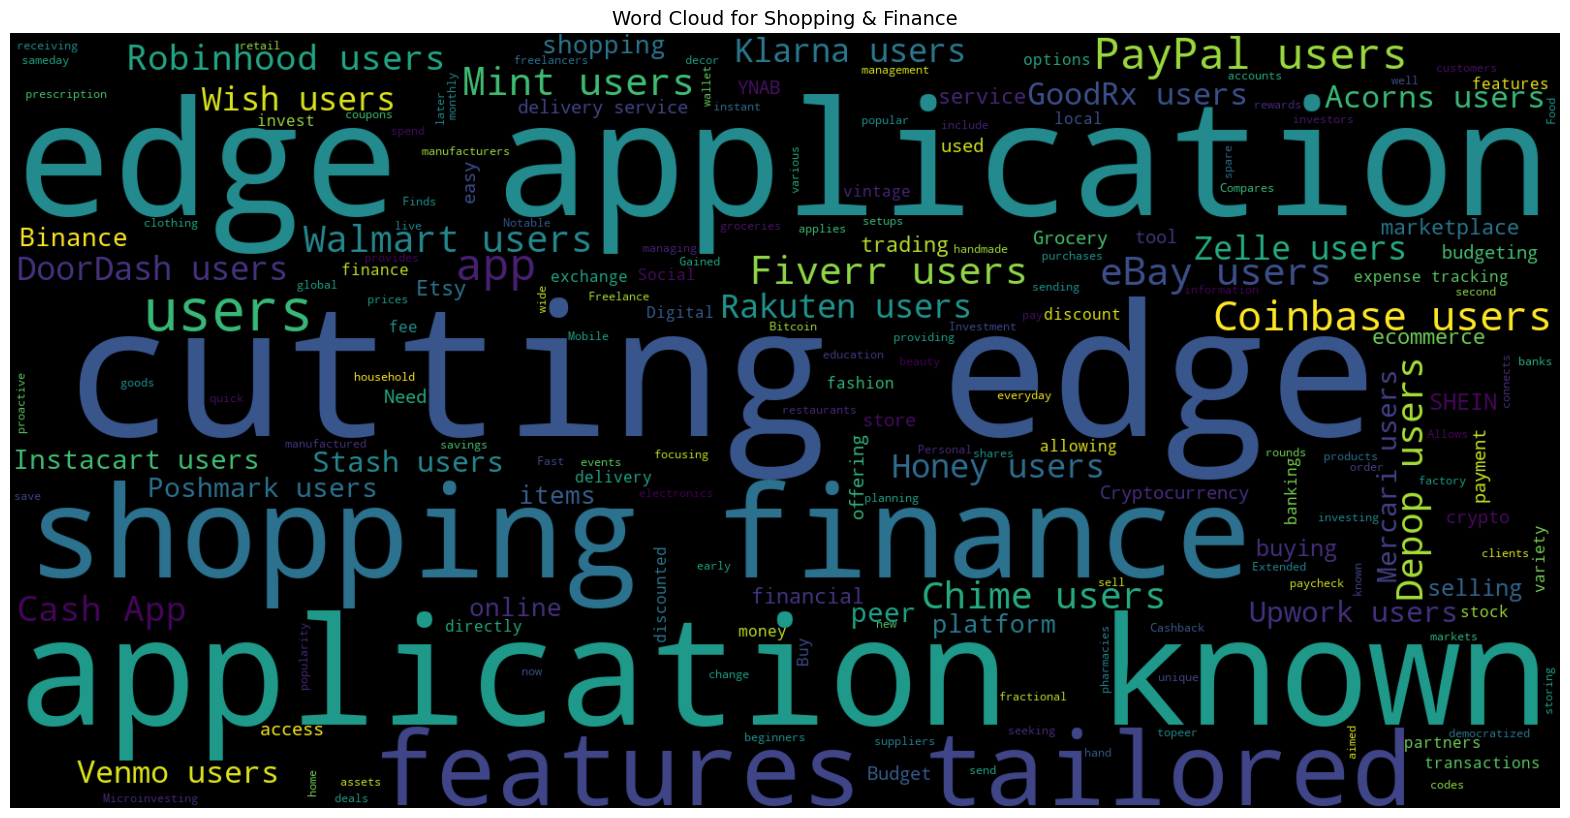

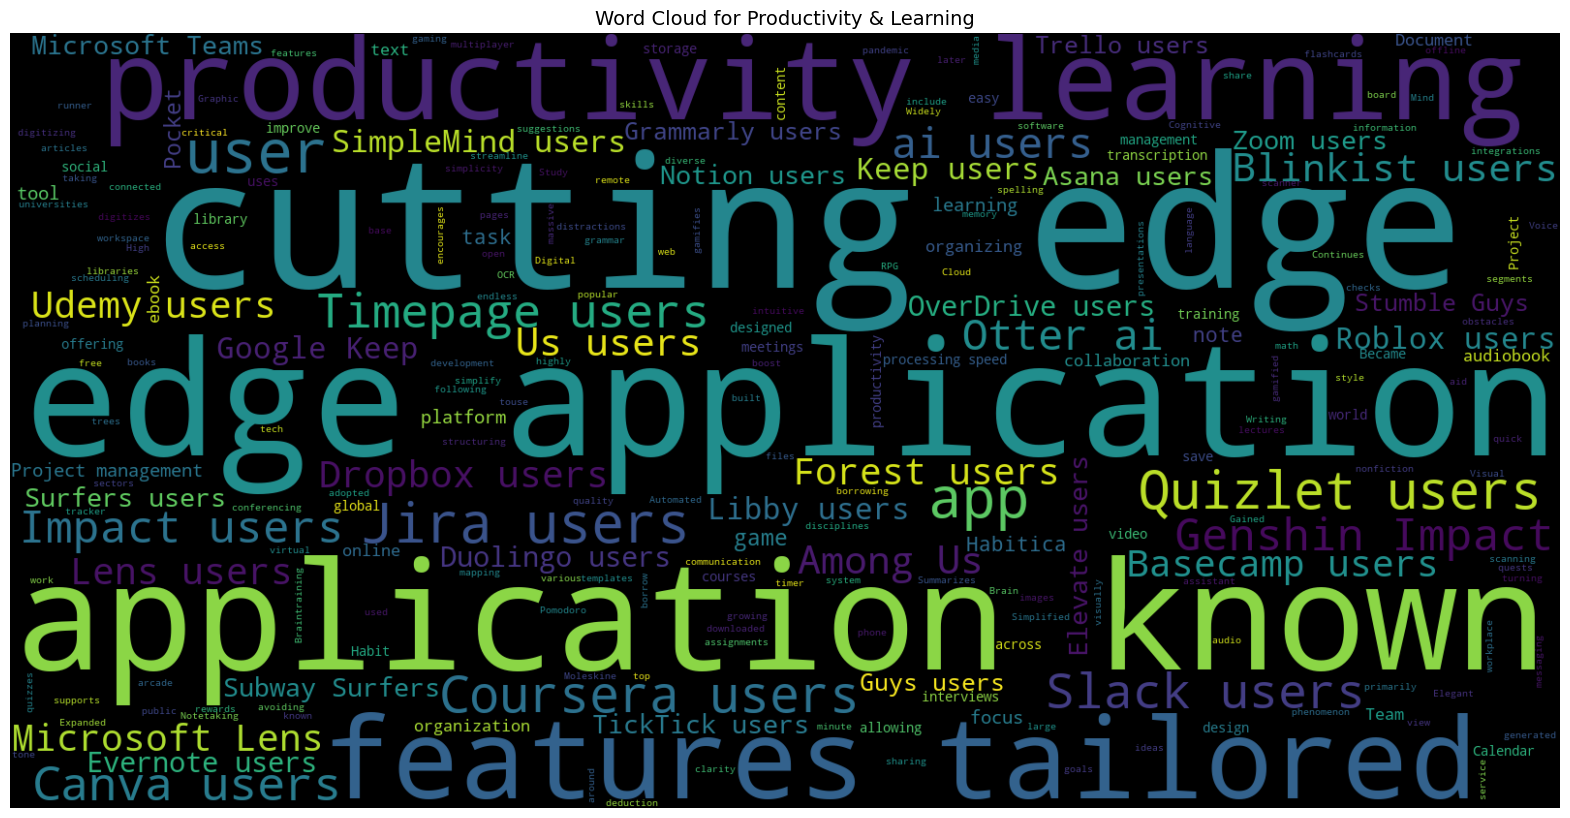

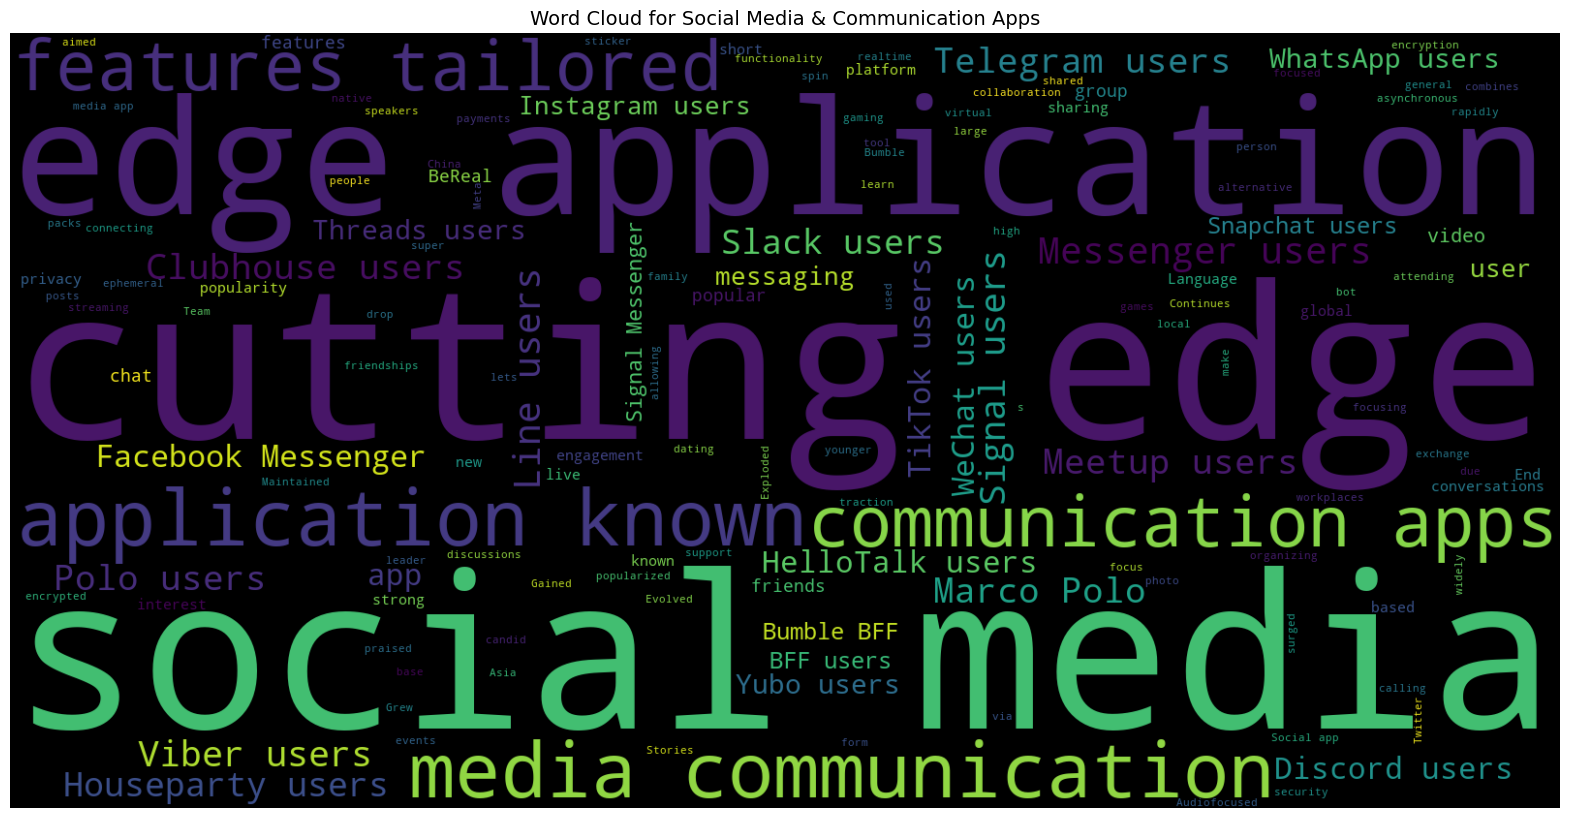

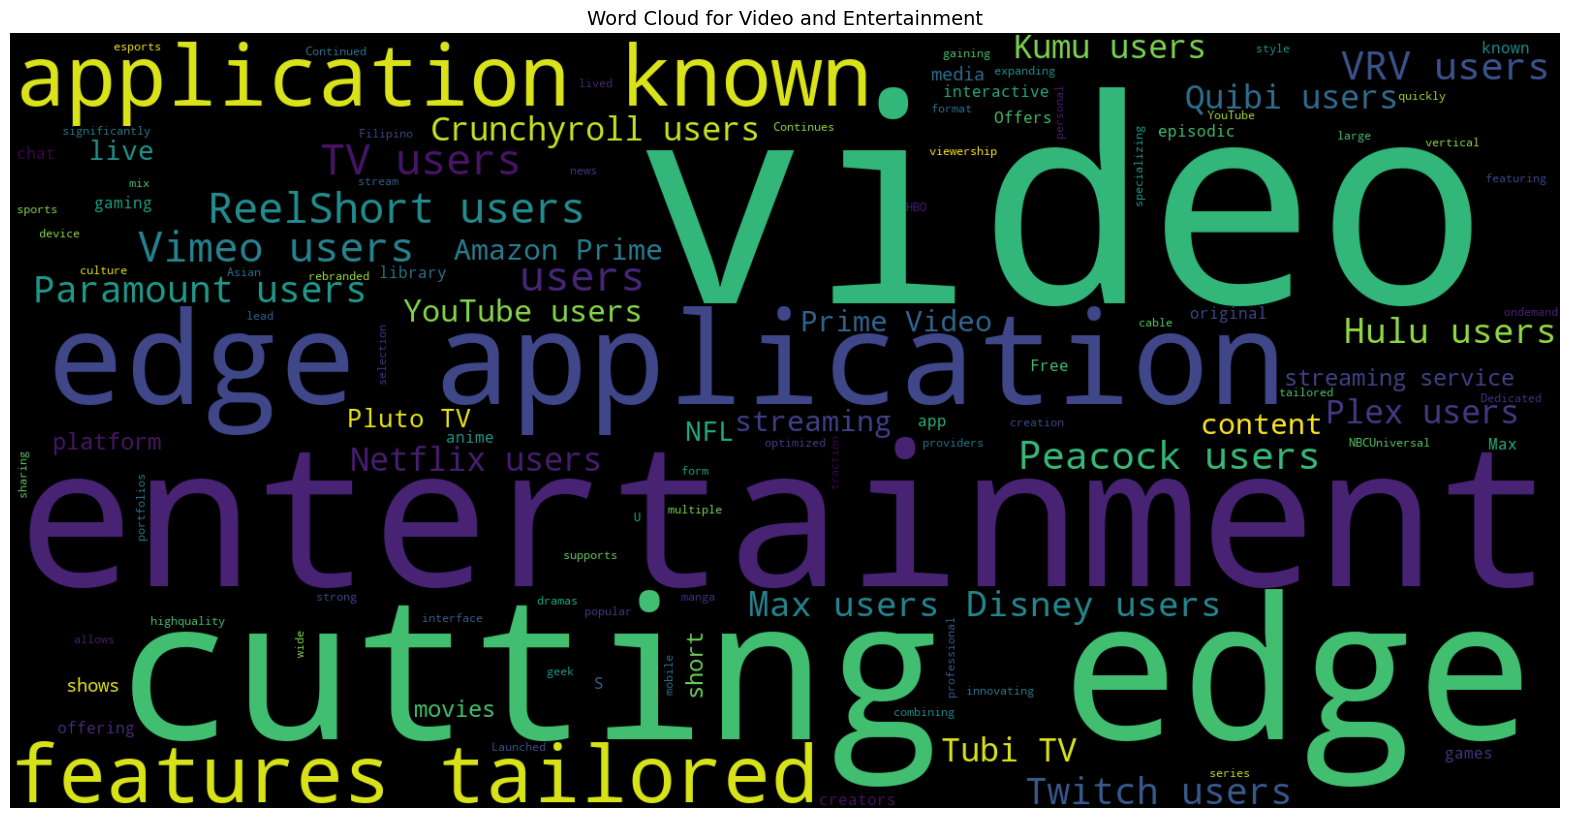

In [14]:
# Word Cloud Generation for all apps dynamically
def generate_word_clouds(X):
    tools = X['Usedfor'].unique()
    for tool in tools:
        plt.figure(figsize=(20, 20))
        wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(df[df['Usedfor'] == tool]['Description'].astype(str)))
        plt.imshow(wc, interpolation='bilinear')
        plt.title(f'Word Cloud for {tool}', fontsize=14)
        plt.axis('off')  # Hide axes
        plt.show()

generate_word_clouds(X)

In [15]:
X.iloc[2]['Description']

' A popular multiplayer arcade game with over the top obstacles.'

In [16]:
X.iloc[16]['Description']

' Buy now, pay later platform used in various ecommerce setups. '

In [17]:
X.head()

,AppName,Description,Usedfor,Review
1,Wish,A global ecommerce platform known for discoun...,Shopping & Finance,"The deals are incredible, though sometimes you..."
3,Udemy,"A platform for learning, with courses across ...",Productivity & Learning,I?ve learned so many new skills with Udemy! Th...
4,Stumble Guys,A popular multiplayer arcade game with over t...,Productivity & Learning,Such a fun and chaotic game to play with frien...
5,BeReal,"A realtime, candid photo sharing app that sur...",Social Media & Communication Apps,"It?s refreshing to see real, unfiltered photos..."
8,Bumble BFF,"A spin off of the dating app Bumble, focused ...",Social Media & Communication Apps,Bumble BFF made meeting new friends feel easy ...


In [18]:
for i, col in enumerate(X.columns):
    X.iloc[:,i] = X.iloc[:,i].str.replace('"','')

In [19]:
pd.set_option('max_colwidth', None)

In [20]:
X.head()

,AppName,Description,Usedfor,Review
1,Wish,A global ecommerce platform known for discounted goods directly from manufacturers,Shopping & Finance,"The deals are incredible, though sometimes you get what you pay for. I find it fun to browse, especially for unique items and small gadgets!"
3,Udemy,"A platform for learning, with courses across various disciplines.",Productivity & Learning,"I?ve learned so many new skills with Udemy! The course variety is fantastic, and I appreciate the lifetime access to content."
4,Stumble Guys,A popular multiplayer arcade game with over the top obstacles.,Productivity & Learning,"Such a fun and chaotic game to play with friends! The obstacle courses are hilarious, and it never gets old competing for the win."
5,BeReal,"A realtime, candid photo sharing app that surged in popularity.",Social Media & Communication Apps,"It?s refreshing to see real, unfiltered photos of friends! The notification timing adds a fun, spontaneous element to social media."
8,Bumble BFF,"A spin off of the dating app Bumble, focused on connecting people for friendships.",Social Media & Communication Apps,Bumble BFF made meeting new friends feel easy and safe! I?ve already met some amazing people with shared interests.


In [21]:
# Clean the reviews
nltk.download('stopwords')
nltk.download('wordnet')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tom98\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tom98\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [24]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    words = letters_only.lower().split()
    meaningful_words = [w for w in words if not w in stop]
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    return( ' '.join(lemmitize_words))

In [25]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    words = letters_only.lower().split()
    meaningful_words = [w for w in words if not w in stop]
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    return( ' '.join(lemmitize_words))

In [26]:
# Clean the reviews
X['Des_clean'] = X['Description'].apply(review_to_words)
X['Review_clean'] = X['Review'].apply(review_to_words)

In [27]:
X.head()

,AppName,Description,Usedfor,Review,Des_clean,Review_clean
1,Wish,A global ecommerce platform known for discounted goods directly from manufacturers,Shopping & Finance,"The deals are incredible, though sometimes you get what you pay for. I find it fun to browse, especially for unique items and small gadgets!",global ecommerce platform known discounted good directly manufacturer,deal incredible though sometimes get pay find fun browse especially unique item small gadget
3,Udemy,"A platform for learning, with courses across various disciplines.",Productivity & Learning,"I?ve learned so many new skills with Udemy! The course variety is fantastic, and I appreciate the lifetime access to content.",platform learning course across various discipline,learned many new skill udemy course variety fantastic appreciate lifetime access content
4,Stumble Guys,A popular multiplayer arcade game with over the top obstacles.,Productivity & Learning,"Such a fun and chaotic game to play with friends! The obstacle courses are hilarious, and it never gets old competing for the win.",popular multiplayer arcade game top obstacle,fun chaotic game play friend obstacle course hilarious never get old competing win
5,BeReal,"A realtime, candid photo sharing app that surged in popularity.",Social Media & Communication Apps,"It?s refreshing to see real, unfiltered photos of friends! The notification timing adds a fun, spontaneous element to social media.",realtime candid photo sharing app surged popularity,refreshing see real unfiltered photo friend notification timing add fun spontaneous element social medium
8,Bumble BFF,"A spin off of the dating app Bumble, focused on connecting people for friendships.",Social Media & Communication Apps,Bumble BFF made meeting new friends feel easy and safe! I?ve already met some amazing people with shared interests.,spin dating app bumble focused connecting people friendship,bumble bff made meeting new friend feel easy safe already met amazing people shared interest


In [28]:
# Prepare features and target
X_feat = X['Des_clean']
y = X[['AppName','Usedfor']]
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, stratify=y['Usedfor'], test_size=0.2, random_state=0)

In [29]:
# Confusion Matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
# Vectorization
count_vectorizer = CountVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

In [31]:
# Fit Count Vectorizer and TF-IDF
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

Naive Bayes accuracy for AppName prediction: 0.280
Naive Bayes accuracy for Usedfor prediction: 0.970


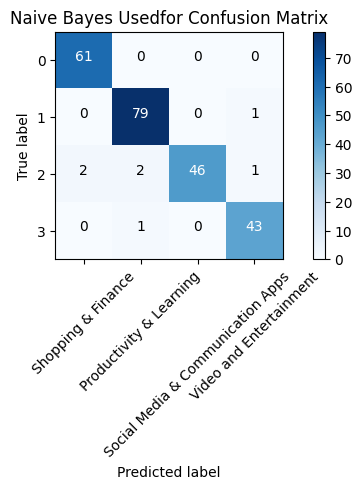

In [32]:
# Machine Learning Model: Naive Bayes with MultiOutputClassifier
mnb_multi = MultiOutputClassifier(MultinomialNB())
mnb_multi.fit(count_train, y_train)

# Make predictions
pred_nb_multi = mnb_multi.predict(count_test)

# Calculate accuracy for both outputs
appname_accuracy_nb = metrics.accuracy_score(y_test['AppName'], pred_nb_multi[:, 0])
usedfor_accuracy_nb = metrics.accuracy_score(y_test['Usedfor'], pred_nb_multi[:, 1])

print(f"Naive Bayes accuracy for AppName prediction: {appname_accuracy_nb:.3f}")
print(f"Naive Bayes accuracy for Usedfor prediction: {usedfor_accuracy_nb:.3f}")

# Confusion Matrix for Usedfor Prediction
cm_nb_usedfor = metrics.confusion_matrix(y_test['Usedfor'], pred_nb_multi[:, 1], labels=y['Usedfor'].unique())
plot_confusion_matrix(cm_nb_usedfor, classes=y['Usedfor'].unique(), title='Naive Bayes Usedfor Confusion Matrix')
plt.show()

Passive Aggressive accuracy for AppName prediction: 0.898
Passive Aggressive accuracy for Usedfor prediction: 0.975


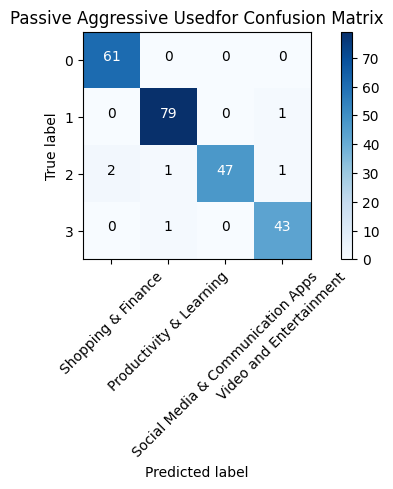

In [33]:
# Machine Learning Model: Passive Aggressive Classifier with MultiOutputClassifier
passive_multi = MultiOutputClassifier(PassiveAggressiveClassifier(random_state=0))
passive_multi.fit(count_train, y_train)

# Make predictions
pred_pass_multi = passive_multi.predict(count_test)

# Calculate accuracy for both outputs
appname_accuracy_pass = metrics.accuracy_score(y_test['AppName'], pred_pass_multi[:, 0])
usedfor_accuracy_pass = metrics.accuracy_score(y_test['Usedfor'], pred_pass_multi[:, 1])

print(f"Passive Aggressive accuracy for AppName prediction: {appname_accuracy_pass:.3f}")
print(f"Passive Aggressive accuracy for Usedfor prediction: {usedfor_accuracy_pass:.3f}")

# Confusion Matrix for Usedfor Prediction
cm_pass_usedfor = metrics.confusion_matrix(y_test['Usedfor'], pred_pass_multi[:, 1], labels=y['Usedfor'].unique())
plot_confusion_matrix(cm_pass_usedfor, classes=y['Usedfor'].unique(), title='Passive Aggressive Usedfor Confusion Matrix')
plt.show()

TF-IDF Naive Bayes accuracy for AppName prediction: 0.695
TF-IDF Naive Bayes accuracy for Usedfor prediction: 0.975


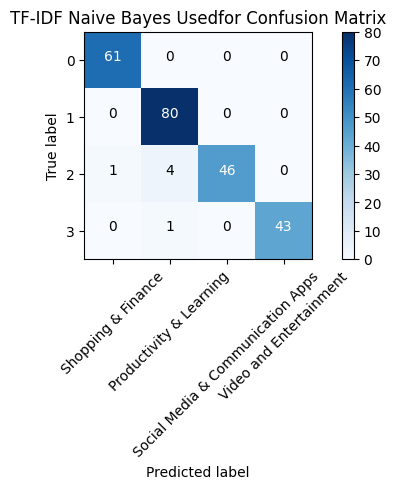

In [34]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# TF-IDF: Naive Bayes with MultiOutputClassifier
mnb_tf_multi = MultiOutputClassifier(MultinomialNB())
mnb_tf_multi.fit(tfidf_train, y_train)

# Make predictions
pred_nb_tf_multi = mnb_tf_multi.predict(tfidf_test)

# Calculate accuracy for both outputs
appname_accuracy_nb_tf = metrics.accuracy_score(y_test['AppName'], pred_nb_tf_multi[:, 0])
usedfor_accuracy_nb_tf = metrics.accuracy_score(y_test['Usedfor'], pred_nb_tf_multi[:, 1])

print(f"TF-IDF Naive Bayes accuracy for AppName prediction: {appname_accuracy_nb_tf:.3f}")
print(f"TF-IDF Naive Bayes accuracy for Usedfor prediction: {usedfor_accuracy_nb_tf:.3f}")

# Confusion Matrix for Usedfor Prediction
cm_nb_tf_usedfor = metrics.confusion_matrix(y_test['Usedfor'], pred_nb_tf_multi[:, 1], labels=y['Usedfor'].unique())
plot_confusion_matrix(cm_nb_tf_usedfor, classes=y['Usedfor'].unique(), title='TF-IDF Naive Bayes Usedfor Confusion Matrix')
plt.show()

TF-IDF Passive Aggressive accuracy for AppName prediction: 0.898
TF-IDF Passive Aggressive accuracy for Usedfor prediction: 0.979


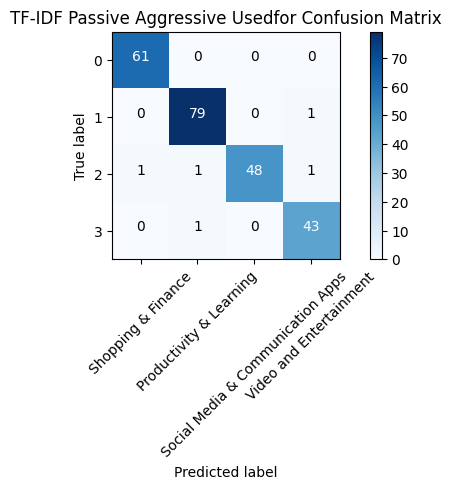

In [35]:
# TF-IDF: Passive Aggressive Classifier with MultiOutputClassifier
pass_tf_multi = MultiOutputClassifier(PassiveAggressiveClassifier(random_state=0))
pass_tf_multi.fit(tfidf_train, y_train)

# Make predictions
pred_pass_tf_multi = pass_tf_multi.predict(tfidf_test)

# Calculate accuracy for both outputs
appname_accuracy_pass_tf = metrics.accuracy_score(y_test['AppName'], pred_pass_tf_multi[:, 0])
usedfor_accuracy_pass_tf = metrics.accuracy_score(y_test['Usedfor'], pred_pass_tf_multi[:, 1])

print(f"TF-IDF Passive Aggressive accuracy for AppName prediction: {appname_accuracy_pass_tf:.3f}")
print(f"TF-IDF Passive Aggressive accuracy for Usedfor prediction: {usedfor_accuracy_pass_tf:.3f}")

# Confusion Matrix for Usedfor Prediction
cm_pass_tf_usedfor = metrics.confusion_matrix(y_test['Usedfor'], pred_pass_tf_multi[:, 1], labels=y['Usedfor'].unique())
plot_confusion_matrix(cm_pass_tf_usedfor, classes=y['Usedfor'].unique(), title='TF-IDF Passive Aggressive Usedfor Confusion Matrix')
plt.show()

In [36]:
# Multi-output Passive Aggressive Classifier
passive_multi = MultiOutputClassifier(PassiveAggressiveClassifier(random_state=0))
passive_multi.fit(tfidf_train, y_train)

# Predict on the test set
predictions = passive_multi.predict(tfidf_test)

In [37]:
# Evaluate model accuracy for both outputs
appname_accuracy = metrics.accuracy_score(y_test['AppName'], predictions[:, 0])
usedfor_accuracy = metrics.accuracy_score(y_test['Usedfor'], predictions[:, 1])

In [38]:
X.head()

,AppName,Description,Usedfor,Review,Des_clean,Review_clean
1,Wish,A global ecommerce platform known for discounted goods directly from manufacturers,Shopping & Finance,"The deals are incredible, though sometimes you get what you pay for. I find it fun to browse, especially for unique items and small gadgets!",global ecommerce platform known discounted good directly manufacturer,deal incredible though sometimes get pay find fun browse especially unique item small gadget
3,Udemy,"A platform for learning, with courses across various disciplines.",Productivity & Learning,"I?ve learned so many new skills with Udemy! The course variety is fantastic, and I appreciate the lifetime access to content.",platform learning course across various discipline,learned many new skill udemy course variety fantastic appreciate lifetime access content
4,Stumble Guys,A popular multiplayer arcade game with over the top obstacles.,Productivity & Learning,"Such a fun and chaotic game to play with friends! The obstacle courses are hilarious, and it never gets old competing for the win.",popular multiplayer arcade game top obstacle,fun chaotic game play friend obstacle course hilarious never get old competing win
5,BeReal,"A realtime, candid photo sharing app that surged in popularity.",Social Media & Communication Apps,"It?s refreshing to see real, unfiltered photos of friends! The notification timing adds a fun, spontaneous element to social media.",realtime candid photo sharing app surged popularity,refreshing see real unfiltered photo friend notification timing add fun spontaneous element social medium
8,Bumble BFF,"A spin off of the dating app Bumble, focused on connecting people for friendships.",Social Media & Communication Apps,Bumble BFF made meeting new friends feel easy and safe! I?ve already met some amazing people with shared interests.,spin dating app bumble focused connecting people friendship,bumble bff made meeting new friend feel easy safe already met amazing people shared interest


In [39]:
X.tail()

,AppName,Description,Usedfor,Review,Des_clean,Review_clean
1993,Binance,A cutting-edge application known for shopping & finance with features tailored to Binance users.,Shopping & Finance,This Binance app has been helpful for shopping & finance. The recent updates improved the user experience.,cutting edge application known shopping finance feature tailored binance user,binance app helpful shopping finance recent update improved user experience
1994,Kumu,A cutting-edge application known for video and entertainment with features tailored to Kumu users.,Video and Entertainment,This Kumu app has been helpful for video and entertainment. The recent updates improved the user experience.,cutting edge application known video entertainment feature tailored kumu user,kumu app helpful video entertainment recent update improved user experience
1995,Habitica,A cutting-edge application known for productivity & learning with features tailored to Habitica users.,Productivity & Learning,This Habitica app has been helpful for productivity & learning. The recent updates improved the user experience.,cutting edge application known productivity learning feature tailored habitica user,habitica app helpful productivity learning recent update improved user experience
1997,Timepage,A cutting-edge application known for productivity & learning with features tailored to Timepage users.,Productivity & Learning,This Timepage app has been helpful for productivity & learning. The recent updates improved the user experience.,cutting edge application known productivity learning feature tailored timepage user,timepage app helpful productivity learning recent update improved user experience
1999,Vimeo,A cutting-edge application known for video and entertainment with features tailored to Vimeo users.,Video and Entertainment,This Vimeo app has been helpful for video and entertainment. The recent updates improved the user experience.,cutting edge application known video entertainment feature tailored vimeo user,vimeo app helpful video entertainment recent update improved user experience


In [40]:
# Top Tools Extraction based on ratings and usefulness
def top_apps_extraction(condition):
    df_top = df[(df['Rating'] >= 3) & (df['UsefulCount']>=100)].sort_values(by=['Rating','UsefulCount'], ascending=[False,False])
    app_list = df_top[df_top['Usedfor'] == condition]['AppName'].head(3).tolist()
    if not app_list:
        return ["No tools found"]
    return app_list

In [41]:
# Example sentences for prediction
sentences = ["This Habitica app has been helpful for productivity & learning. The recent updates improved the user experience.",
             "cutting edge application known video entertainment feature tailored vimeo user"
]

In [42]:
# Prediction function for custom text
def predict_text(lst_text):
    df_test = pd.DataFrame(lst_text, columns=['test_sent'])
    df_test['test_sent'] = df_test['test_sent'].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer.transform(df_test['test_sent'])
    prediction = passive_multi.predict(tfidf_bigram)

    df_test['AppName_prediction'] = prediction[:, 0]
    df_test['Usedfor_prediction'] = prediction[:, 1]
    return df_test[['test_sent', 'AppName_prediction', 'Usedfor_prediction']]

In [43]:
df_testsent = predict_text(sentences)
df_testsent

,test_sent,AppName_prediction,Usedfor_prediction
0,habitica app helpful productivity learning recent update improved user experience,Habitica,Productivity & Learning
1,cutting edge application known video entertainment feature tailored vimeo user,Vimeo,Video and Entertainment


In [44]:
# Display predictions and top app suggestions
for idx, row in df_testsent.iterrows():
    text = row['test_sent']
    app_pred = row['AppName_prediction']
    usedfor_pred = row['Usedfor_prediction']
    top_apps = top_apps_extraction(usedfor_pred)

    print(f"Text: {text}\nPredicted AppName: {app_pred}\nPredicted Use Case: {usedfor_pred}")
    print("Other Top Suggested Apps:", ", ".join(top_apps))
    print()

Text: habitica app helpful productivity learning recent update improved user experience
Predicted AppName: Habitica 
Predicted Use Case: Productivity & Learning
Other Top Suggested Apps: TickTick , Grammarly , Timepage 

Text: cutting edge application known video entertainment feature tailored vimeo user
Predicted AppName: Vimeo 
Predicted Use Case: Video and Entertainment
Other Top Suggested Apps: Plex , Vimeo , Vimeo 



In [45]:
# Test a single prediction with specific input
test = passive_multi.predict(tfidf_vectorizer.transform(["This Binance app has been helpful for shopping & finance. The recent updates improved the user experience."]))
print("Predicted AppName and Usedfor:", test[0])

Predicted AppName and Usedfor: ['Binance ' 'Shopping & Finance']


In [46]:
# Save the model and vectorizer
joblib.dump(tfidf_vectorizer, 'tfidfvectorizer.pkl')
joblib.dump(pass_tf_multi, 'passmodel.pkl')

['passmodel.pkl']

In [47]:
# Load the model and vectorizer
def load_models():
    model = joblib.load('passmodel.pkl')
    vectorizer = joblib.load('tfidfvectorizer.pkl')
    return model, vectorizer